In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/data/store-sales-time-series-forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt        
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/data/store-sales-time-series-forecasting\holidays_events.csv
C:/data/store-sales-time-series-forecasting\oil.csv
C:/data/store-sales-time-series-forecasting\sample_submission.csv
C:/data/store-sales-time-series-forecasting\stores.csv
C:/data/store-sales-time-series-forecasting\test.csv
C:/data/store-sales-time-series-forecasting\train.csv
C:/data/store-sales-time-series-forecasting\transactions.csv


In [2]:
path = 'C:/data/store-sales-time-series-forecasting/'
os.listdir(path)

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [3]:
data_oil = pd.read_csv(path+'oil.csv')
train_data = pd.read_csv(path+'train.csv', index_col=0)
test_data = pd.read_csv(path+'test.csv', index_col=0)
samp_subm = pd.read_csv(path+'sample_submission.csv')
data_holi = pd.read_csv(path+'holidays_events.csv')
data_store =  pd.read_csv(path+'stores.csv')
data_trans = pd.read_csv(path+'transactions.csv')

C:\Users\Hankm\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
print(f'Number of data_oil samples: {data_oil.shape}')
print(f'Number of train_data samples: {train_data.shape}')
print(f'Number of test_data samples: {test_data.shape}')
print(f'Number of samp_subm samples: {samp_subm.shape}')
print(f'Number of data_holi samples: {data_holi.shape}')
print(f'Number of data_store samples: {data_store.shape}')
print(f'Number of data_trans samples: {data_trans.shape}')
print(train_data.info())
print(train_data.columns)
print(train_data.head())

Number of data_oil samples: (1218, 2)
Number of train_data samples: (3000888, 5)
Number of test_data samples: (28512, 4)
Number of samp_subm samples: (28512, 2)
Number of data_holi samples: (350, 6)
Number of data_store samples: (54, 5)
Number of data_trans samples: (83488, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB
None
Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
          date  store_nbr      family  sales  onpromotion
id                                                       
0   2013-01-01          1  AUTOMOTIVE    0.0            0
1   2013-01-01          1   BABY CARE    0.0            0
2   2013-01-01          1      BEAUTY    0.0    

In [5]:
print(data_trans.head())
print(train_data.head())

         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922
          date  store_nbr      family  sales  onpromotion
id                                                       
0   2013-01-01          1  AUTOMOTIVE    0.0            0
1   2013-01-01          1   BABY CARE    0.0            0
2   2013-01-01          1      BEAUTY    0.0            0
3   2013-01-01          1   BEVERAGES    0.0            0
4   2013-01-01          1       BOOKS    0.0            0


In [6]:
print(train_data['store_nbr'].count())
print(train_data['store_nbr'].unique())

3000888
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]


In [7]:
print(data_oil.head())

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20


# Equador's economy is dependent on the crude oil price. Let's examine first the relationship between crude oil and grocery sales and transactions.

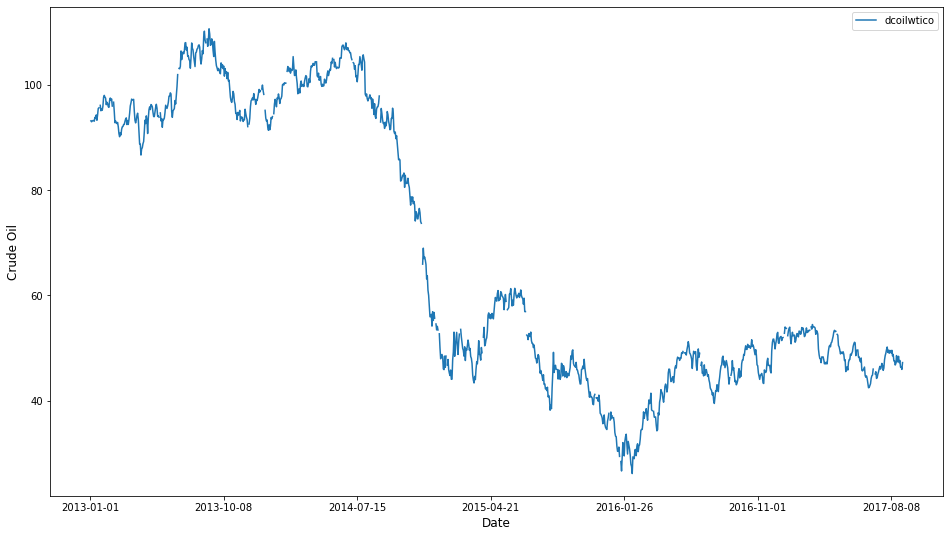

In [8]:
ax = data_oil.set_index('date').plot(figsize = (16, 9))
ax.set_xlabel('Date', fontsize = 'large');
ax.set_ylabel("Crude Oil", fontsize = 'large');

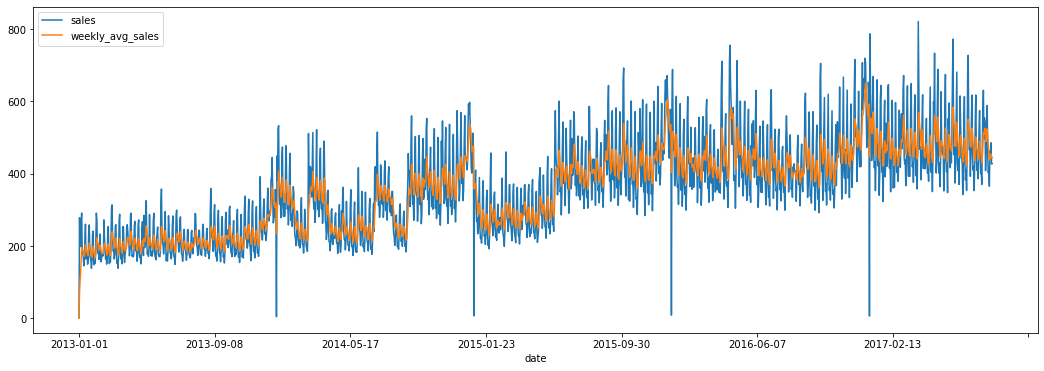

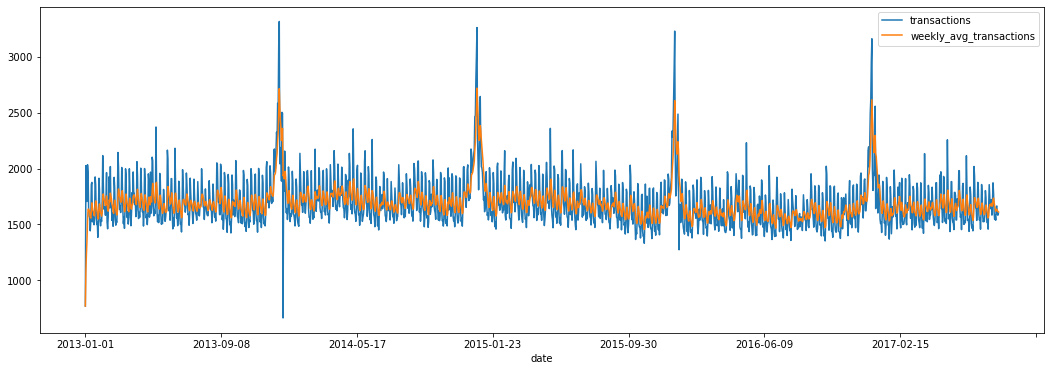

In [11]:
avg_sales = train_data.groupby('date').agg({'sales': 'mean'}).reset_index()
#daily_avg_sales['weekly_avg_sales'] = daily_avg_sales['sales'].rolling(window=7).mean()
avg_sales['weekly_avg_sales'] = avg_sales['sales'].ewm(span=7, adjust=False).mean()

'''ewm : 지수가중함수 / 오래된 데이터에 지수감쇠를 적용하여 최근 데이터가 더 큰 영향을 끼지도록 가중치를 주는 함수.
보통 추가 메서드로 mean() 을 사용해서 지수가중평균으로 사용'''


#ax = daily_avg_sales.set_index('date').plot(figsize = (16, 8))
ax1 = avg_sales.plot(x= 'date', y= ['sales', 'weekly_avg_sales'], figsize=(18,6))

avg_transactions = data_trans.groupby('date').agg({'transactions': 'mean'}).reset_index()

#avg_transaction['weekly_avg_sales'] = avg_transaction['transactions'].rolling(window=7).mean()
avg_transactions['weekly_avg_transactions'] = avg_transactions['transactions'].ewm(span=7, adjust=False).mean()

ax2 = avg_transactions.plot(x= 'date', y= ['transactions', 'weekly_avg_transactions'], figsize=(18,6))

In [13]:
print(data_oil.head())
print(avg_sales.head())
print(avg_transactions.head())

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
         date       sales  weekly_avg_sales
0  2013-01-01    1.409438          1.409438
1  2013-01-02  278.390807         70.654780
2  2013-01-03  202.840197        103.701135
3  2013-01-04  198.911154        127.503640
4  2013-01-05  267.873244        162.596041
         date  transactions  weekly_avg_transactions
0  2013-01-01    770.000000               770.000000
1  2013-01-02   2026.413043              1084.103261
2  2013-01-03   1706.608696              1239.729620
3  2013-01-04   1706.391304              1356.395041
4  2013-01-05   2034.195652              1525.845194


In [24]:
data_oil['sales'] = avg_sales['sales']
data_oil['transactions'] = avg_transactions['transactions']
#print(data_oil.head())
data_oil.corr()

,dcoilwtico,sales,transactions
dcoilwtico,1.000000,-0.500805,0.04319
sales,-0.500805,1.000000,0.37651
transactions,0.043190,0.376510,1.00000


# Correlation between oil and sales and transaction suggests that the country's economic status and everyday grocery consumption do not have a particular relationship.

# Let's check items that are most sold and the promotion to see which items influence the most for the total sales.

In [14]:
print(train_data.family.unique())
print(len(train_data.family.unique()))
train_data['family'] = train_data['family'].astype('category')
train_data['family_category'] = train_data['family'].cat.codes

family_category = dict( zip( train_data['family'].cat.codes, train_data['family'] ) )
family_category

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
33


{0: 'AUTOMOTIVE',
 1: 'BABY CARE',
 2: 'BEAUTY',
 3: 'BEVERAGES',
 4: 'BOOKS',
 5: 'BREAD/BAKERY',
 6: 'CELEBRATION',
 7: 'CLEANING',
 8: 'DAIRY',
 9: 'DELI',
 10: 'EGGS',
 11: 'FROZEN FOODS',
 12: 'GROCERY I',
 13: 'GROCERY II',
 14: 'HARDWARE',
 15: 'HOME AND KITCHEN I',
 16: 'HOME AND KITCHEN II',
 17: 'HOME APPLIANCES',
 18: 'HOME CARE',
 19: 'LADIESWEAR',
 20: 'LAWN AND GARDEN',
 21: 'LINGERIE',
 22: 'LIQUOR,WINE,BEER',
 23: 'MAGAZINES',
 24: 'MEATS',
 25: 'PERSONAL CARE',
 26: 'PET SUPPLIES',
 27: 'PLAYERS AND ELECTRONICS',
 28: 'POULTRY',
 29: 'PREPARED FOODS',
 30: 'PRODUCE',
 31: 'SCHOOL AND OFFICE SUPPLIES',
 32: 'SEAFOOD'}

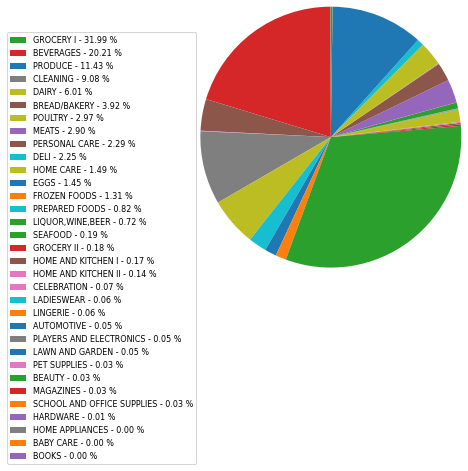

In [15]:
data_grouped_family_types = train_data.groupby(['family_category']).mean()[['sales', 'onpromotion']]


data_grouped_family_types['%_s'] = 100 * data_grouped_family_types['sales'] / data_grouped_family_types['sales'].sum()
data_grouped_family_types['%_s'] = data_grouped_family_types['%_s'].round(decimals = 3)


percent = 100 * data_grouped_family_types['sales'] / data_grouped_family_types['sales'].sum()
percent = percent.round(decimals = 3)
patches, texts = plt.pie(data_grouped_family_types['%_s'], startangle=90, radius=1.5)


lables_2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(family_category.values(), percent)]


sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, lables_2, data_grouped_family_types['%_s']),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

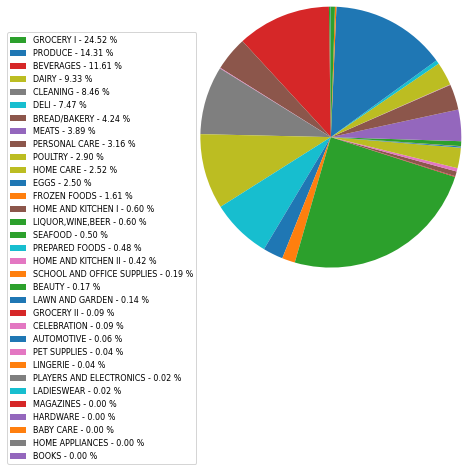

In [35]:
data_grouped_family_types = train_data.groupby(['family_category']).mean()[['sales', 'onpromotion']]


data_grouped_family_types['%_p'] = 100 * data_grouped_family_types['onpromotion'] / data_grouped_family_types['onpromotion'].sum()
data_grouped_family_types['%_p'] = data_grouped_family_types['%_p'].round(decimals = 3)


percent = 100 * data_grouped_family_types['onpromotion'] / data_grouped_family_types['onpromotion'].sum()
percent = percent.round(decimals = 3)
patches, texts = plt.pie(data_grouped_family_types['%_p'], startangle=90, radius=1.5)


lables_2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(family_category.values(), percent)]


sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, lables_2, data_grouped_family_types['%_p']),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

# The top 5 most sold are Grocery, beverages, cleaning, dairy, and produce. Grocery + beverage account for more than 50% of total sales.

# Let's check sales in different time frames.

In [16]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year

<AxesSubplot:title={'center':'sales - year'}, xlabel='year'>

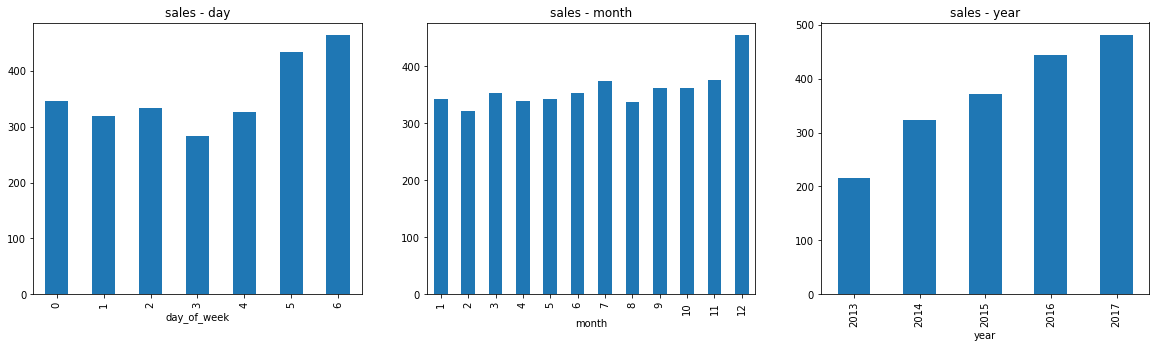

In [17]:
data_grouped_day = train_data.groupby(['day_of_week']).mean()['sales']
data_grouped_month = train_data.groupby(['month']).mean()['sales']
data_grouped_year = train_data.groupby(['year']).mean()['sales']

plt.subplots(3,1, figsize=(20,5))
plt.subplot(131)
plt.title('sales - day')
data_grouped_day.plot(kind='bar', stacked=True)
plt.subplot(132)
plt.title('sales - month')
data_grouped_month.plot(kind='bar', stacked=True)
plt.subplot(133)
plt.title('sales - year')
data_grouped_year.plot(kind='bar', stacked=True)

# Sales analysis in different time frame
* In a daily basis, Saturday and Sunday show the highest sales.
* In a month basis, December sales are particularly strong.
* In a yearly basis, It is growing at steady pace.

# Check sales for holidays

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64
        date     type
0 2012-03-02  Holiday
1 2012-04-01  Holiday
2 2012-04-12  Holiday
3 2012-04-14  Holiday
4 2012-04-21  Holiday
        date       sales
0 2013-01-01    1.409438
1 2013-01-02  278.390807
2 2013-01-03  202.840197
3 2013-01-04  198.911154
4 2013-01-05  267.873244
        date      type       sales
0 2013-01-01   Holiday    1.409438
1 2013-01-05  Work Day  267.873244
2 2013-01-12  Work Day  226.295293
3 2013-02-11   Holiday  156.356672
4 2013-02-12   Holiday  173.288884
average holiday sales is 425.4221877399928


C:\Users\Hankm\AppData\Local\Temp/ipykernel_3928/3281321727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_type['date'] = pd.to_datetime(day_type['date'])


Text(0.5, 1.0, 'average holiday sales')

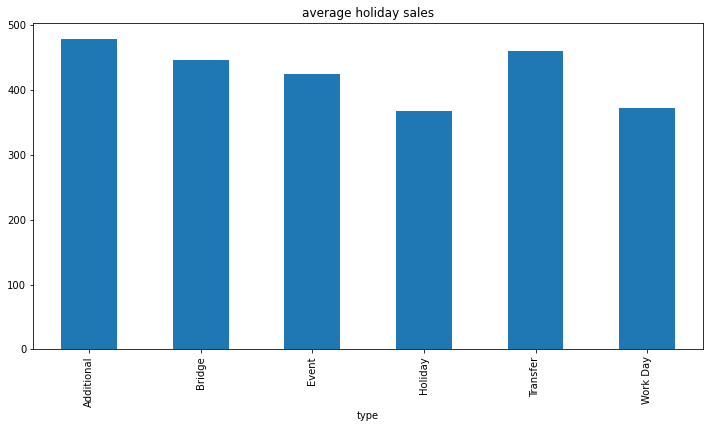

In [29]:
print(data_holi['type'].unique())
print(data_holi['type'].value_counts())

day_type = data_holi[['date', 'type']]
avg_sales = train_data.groupby('date').agg({'sales': 'mean'}).reset_index()

day_type['date'] = pd.to_datetime(day_type['date'])
avg_sales['date'] = pd.to_datetime(avg_sales['date'])

print(day_type.head())
print(avg_sales.head())

df = pd.merge_asof(day_type, avg_sales, on = 'date')
df.dropna(inplace= True)
df.reset_index(drop = True, inplace= True)

print(df.head())

df_1 = df.groupby(['type']).mean()['sales']
average_holiday_sales = df_1.mean()
#print(df_1.head())

print(f'average holiday sales is {average_holiday_sales}')

df_1.plot(kind='bar', figsize = (12,6)).set_title('average holiday sales')

# The average holiday sales are equivalent to Saturday and Sunday sales.

# Let's follow the template provided by Kaggle moderator for future sales prediction. Start with linear regression